In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import  Embedding
from tensorflow.keras.models import Sequential

In [3]:
df = pd.read_csv('spam .csv', encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.columns = ['category', 'email']
df['label']= df.category.map(dict(ham=0,spam=1))
df.head()

,category,email,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
X=df.email
y=df.label
print(X.head())
y.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: email, dtype: object


0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64

In [7]:
len(X[34])

159

In [8]:
from sklearn.model_selection import train_test_split
# split training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [9]:
vocab_size = 10000
#max_length = 130
oov_tok = "<Out-of-Vacab>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



In [11]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token='<oov_tok>')
# Every word will change to a numeric value
tokenizer.fit_on_texts(X_train)



In [12]:

# All sentences would be changed to lost of numerical values

#Treat the foll as doc 1
train_sequences = tokenizer.texts_to_sequences(X_train)

#Treat the foll as doc2
test_sequences = tokenizer.texts_to_sequences(X_test)

In [13]:
word2index = tokenizer.word_index

In [15]:
len(word2index)

7241

In [16]:
len(train_sequences[8])

5

In [20]:
len(train_sequences[45])

8

In [21]:
train_padded= pad_sequences(train_sequences)

In [22]:
len(train_padded[8])

189

In [23]:
len(train_padded[45])

189

In [24]:
train_padded.shape

(3733, 189)

In [25]:
train_padded.shape[1]

189

In [26]:
padded_length = train_padded.shape[1]

In [27]:
padded_length

189

In [28]:
len(test_sequences[1])

7

In [29]:
testing_padded = pad_sequences(test_sequences,maxlen = padded_length)

In [30]:
len(testing_padded[1])

189

In [31]:
import tensorflow as tf

In [32]:
model= Sequential()

In [33]:
embedding_dim = 16

In [34]:
model.add(Embedding(vocab_size, 16, input_length=189))


In [35]:
model.add(Flatten())

In [36]:
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))

In [37]:
model.add(Dense(1, activation='sigmoid'))

In [38]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 189, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 3024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               774400    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 1,000,449
Trainable params: 1,000,449
Non-trainable params: 0
_________________________________________________________________


In [39]:
num_epochs = 5
results=model.fit(train_padded, y_train, epochs=num_epochs, validation_data=(testing_padded, y_test))

Epoch 1/5
117/117 [==============================] - 1s 6ms/step - loss: 0.2020 - accuracy: 0.9266 - val_loss: 0.0666 - val_accuracy: 0.9810
Epoch 2/5
117/117 [==============================] - 1s 6ms/step - loss: 0.0289 - accuracy: 0.9920 - val_loss: 0.0411 - val_accuracy: 0.9897
Epoch 3/5
117/117 [==============================] - 1s 6ms/step - loss: 0.0062 - accuracy: 0.9973 - val_loss: 0.0442 - val_accuracy: 0.9886
Epoch 4/5
117/117 [==============================] - 1s 6ms/step - loss: 7.5915e-04 - accuracy: 1.0000 - val_loss: 0.0509 - val_accuracy: 0.9886
Epoch 5/5
117/117 [==============================] - 1s 6ms/step - loss: 2.4950e-04 - accuracy: 1.0000 - val_loss: 0.0554 - val_accuracy: 0.9886


In [ ]:
# Check word index mapping (to check the number of words in vocabulary)
word2idx = tokenizer.word_index
V = len(word2idx)
print('Total number of unique tokens are:' , V)

In [ ]:
len(tokenizer.word_index)

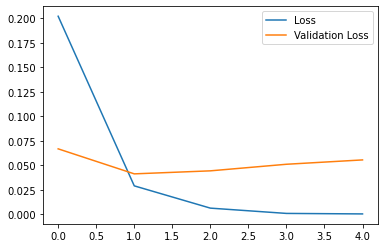

In [40]:
# Loss per iteration
import matplotlib.pyplot as plt
plt.plot(results.history['loss'], label='Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


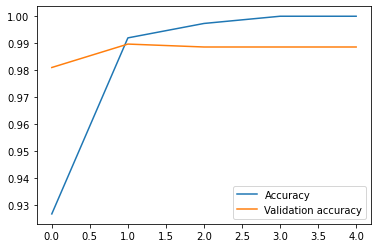

In [41]:
# Accuracy per iteration
plt.plot(results.history['accuracy'], label='Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

## Evaluating the Model

In [42]:
y_pred=model.predict(testing_padded)

In [43]:
y_pred

array([[5.0663620e-02],
       [4.2640990e-05],
       [9.9994552e-01],
       ...,
       [4.5567751e-04],
       [8.8742047e-05],
       [4.8631773e-07]], dtype=float32)

In [44]:
y_pred=y_pred>0.5

In [45]:
y_pred

array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [46]:
y_pred=y_pred.astype(int)

In [47]:
y_pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_pred,y_test)

0.9885807504078303